In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as Circle

import numpy as np

import warnings
warnings.filterwarnings("ignore")

Load CSV and drop columns where all the values coincide. For example, the activation used.

In [54]:
df = pd.read_csv("dvip.csv")
df = df.loc[:, (df != df.iloc[0]).any()] 

Group table by their common parameters and compute mean and std over split

In [61]:
def std(x):
    return np.std(x)/np.sqrt(len(x))
full_df = df.groupby(["dataset_name", "vip_layers", "epochs", "bnn_structure", "dropout", "zero_mean_prior", "prior_kl", "fix_prior_noise"]).agg(["mean", std])
full_df


split  \
                                                                                               mean   
dataset_name vip_layers epochs bnn_structure dropout zero_mean_prior prior_kl fix_prior_noise         
boston       [1]        20000  [10, 10]      0.1     False           False    True              9.5   
                               [10]          0.1     False           False    True              9.5   
                        30000  [10, 10]      0.1     False           False    True              9.5   
                                                     True            False    True              9.5   
                               [10]          0.1     False           False    True              9.5   
...                                                                                             ...   
winered      [5]        30000  [10]          0.2     False           False    True              9.5   
                        40000  [10, 10]      0.0     False           True     False             9.5   
                                             0.1     True            False    True              9.5   
                               [10]          0.0     False           True     False             9.5   
                                             0.1     False           False    True              9.5   

                                                                                                        \
                                                                                                   std   
dataset_name vip_layers epochs bnn_structure dropout zero_mean_prior prior_kl fix_prior_noise            
boston       [1]        20000  [10, 10]      0.1     False           False    True             1.28938   
                               [10]          0.1     False           False    True             1.28938   
                        30000  [10, 10]      0.1     False           False    True             1.28938   
                                                     True            False    True             1.28938   
                               [10]          0.1     False           False    True             1.28938   
...                                                                                                ...   
winered      [5]        30000  [10]          0.2     False           False    True             1.28938   
                        40000  [10, 10]      0.0     False           True     False            1.28938   
                                             0.1     True            False    True             1.28938   
                               [10]          0.0     False           True     False            1.28938   
                                             0.1     False           False    True             1.28938   

                                                                                                LOSS_train  \
                                                                                                      mean   
dataset_name vip_layers epochs bnn_structure dropout zero_mean_prior prior_kl fix_prior_noise                
boston       [1]        20000  [10, 10]      0.1     False           False    True              110.412336   
                               [10]          0.1     False           False    True               92.391862   
                        30000  [10, 10]      0.1     False           False    True               86.004045   
                                                     True            False    True              224.761271   
                               [10]          0.1     False           False    True               65.892821   
...                                                                                                    ...   
winered      [5]        30000  [10]          0.2     False           False    True             1650.689905   
                        40000  [10, 10]      0.0     False        

In [83]:
df.query("split == 0 and vip_layers == '[1]' and zero_mean_prior == False and epochs == 40000 and bnn_structure == '[10]' and dropout == 0.1")

,dataset_name,epochs,vip_layers,bnn_structure,activation,dropout,fix_prior_noise,prior_kl,zero_mean_prior,split,dataset,LOSS_train,RMSE_train,NLL_train,CRPS_train,LOSS,RMSE,NLL,CRPS
543,protein,40000,[1],[10],<built-in method tanh of type object at 0x7ff5...,0.1,True,False,False,0,<utils.dataset.Protein_Dataset object at 0x7ff...,46768.828125,4.477259,2.920955,2.516432,47127.031250,4.516044,2.928866,2.536498
1597,winered,40000,[1],[10],<built-in method tanh of type object at 0x7fc3...,0.1,True,False,False,0,<utils.dataset.WineRed_Dataset object at 0x7fc...,1470.137451,0.484567,0.711958,0.270855,2051.017334,0.675726,1.070051,0.367622
1921,energy,40000,[1],[10],<built-in method tanh of type object at 0x7ff1...,0.1,True,False,False,0,<utils.dataset.Energy_Dataset object at 0x7ff0...,-652.314392,0.466792,1.133760,0.337917,-626.154358,0.524585,1.155578,0.356599
2038,concrete,40000,[1],[10],<built-in method tanh of type object at 0x7f5b...,0.1,True,False,False,0,<utils.dataset.Concrete_Dataset object at 0x7f...,254.889832,4.296345,2.939619,2.452616,395.820099,5.111318,3.060029,2.896724
3317,power,40000,[1],[10],<built-in method tanh of type object at 0x7f20...,0.1,True,False,False,0,<utils.dataset.Power_Dataset object at 0x7f200...,-107.177536,3.934019,2.790511,2.160877,479.088379,4.206184,2.854868,2.193002
3632,naval,40000,[1],[10],<built-in method tanh of type object at 0x7f3a...,0.1,True,False,False,0,<utils.dataset.Naval_Dataset object at 0x7f39e...,-5415.577148,0.001003,-4.891516,0.000795,-5349.905273,0.001018,-4.889199,0.000798
4331,kin8nm,40000,[1],[10],<built-in method tanh of type object at 0x7f65...,0.1,True,False,False,0,<utils.dataset.Kin8nm_Dataset object at 0x7f64...,3434.828857,0.091782,-0.942525,0.051467,3299.191650,0.090144,-0.955257,0.050878
4345,boston,40000,[1],[10],<built-in method tanh of type object at 0x7f7c...,0.1,True,False,False,0,<utils.dataset.Boston_Dataset object at 0x7f7c...,74.974396,1.789458,2.156837,1.041283,648.031616,4.124931,3.048379,2.085645


# Existing configurations

In [62]:
df.groupby(["bnn_structure", "epochs", "dropout", "fix_prior_noise", "prior_kl"]).mean().index

MultiIndex([(  '[10, 10]', 20000, 0.1,  True, False),
            (  '[10, 10]', 30000, 0.1,  True, False),
            (  '[10, 10]', 40000, 0.0, False,  True),
            (  '[10, 10]', 40000, 0.1,  True, False),
            ('[100, 100]', 40000, 0.1,  True, False),
            (      '[10]', 20000, 0.1,  True, False),
            (      '[10]', 30000, 0.1,  True, False),
            (      '[10]', 30000, 0.2,  True, False),
            (      '[10]', 40000, 0.0, False,  True),
            (      '[10]', 40000, 0.1,  True, False),
            ('[200, 200]', 40000, 0.1,  True, False)],
           names=['bnn_structure', 'epochs', 'dropout', 'fix_prior_noise', 'prior_kl'])

# Comparative with other models

In [63]:
vip100 =  full_df.query("zero_mean_prior == False and epochs == 40000 and bnn_structure == '[100, 100]' and dropout == 0.1")
vip100

split  \
                                                                                                   mean   
dataset_name vip_layers epochs bnn_structure dropout zero_mean_prior prior_kl fix_prior_noise             
boston       [1]        40000  [100, 100]    0.1     False           False    True             9.500000   
concrete     [1]        40000  [100, 100]    0.1     False           False    True             9.500000   
energy       [1]        40000  [100, 100]    0.1     False           False    True             9.500000   
naval        [1]        40000  [100, 100]    0.1     False           False    True             8.400000   
power        [1]        40000  [100, 100]    0.1     False           False    True             6.666667   
winered      [1]        40000  [100, 100]    0.1     False           False    True             9.500000   

                                                                                                         \
                                                                                                    std   
dataset_name vip_layers epochs bnn_structure dropout zero_mean_prior prior_kl fix_prior_noise             
boston       [1]        40000  [100, 100]    0.1     False           False    True             1.289380   
concrete     [1]        40000  [100, 100]    0.1     False           False    True             1.289380   
energy       [1]        40000  [100, 100]    0.1     False           False    True             1.289380   
naval        [1]        40000  [100, 100]    0.1     False           False    True             3.447898   
power        [1]        40000  [100, 100]    0.1     False           False    True             0.981307   
winered      [1]        40000  [100, 100]    0.1     False           False    True             1.289380   

                                                                                                 LOSS_train  \
                                                                                                       mean   
dataset_name vip_layers epochs bnn_structure dropout zero_mean_prior prior_kl fix_prior_noise                 
boston       [1]        40000  [100, 100]    0.1     False           False    True              -403.090915   
concrete     [1]        40000  [100, 100]    0.1     False           False    True              -523.686046   
energy       [1]        40000  [100, 100]    0.1     False           False    True             -1189.965643   
naval        [1]        40000  [100, 100]    0.1     False           False    True            -12866.564062   
power        [1]        40000  [100, 100]    0.1     False           False    True             -1419.721029   
winered      [1]        40000  [100, 100]    0.1     False           False    True               187.243884   

                                                                                                          \
                                                                                                     std   
dataset_name vip_layers epochs bnn_structure dropout zero_mean_prior prior_kl fix_prior_noise              
boston       [1]        40000  [100, 100]    0.1     False           False    True              2.266139   
concrete     [1]        40000  [100, 100]    0.1     False           False    True              8.572548   
energy       [1]        40000  [100, 100]    0.1     False           False    True              1.751701   
naval        [1]        40000  [100, 100]    0.1     False           False    True             17.624524   
power        [1]        40000  [100, 100]    0.1     False           False    True             20.784891   
winered      [1]        40000  [100, 100]    0.1     False           False    True              2.268114   

                                                                                              RMSE_train  \
                                                                                         

In [64]:
vip = full_df.query("zero_mean_prior == False and epochs == 40000 and bnn_structure == '[10]' and dropout == 0.1")
#vip =  full_df.query("prior_kl == True and bnn_structure == '[10]'")
vip


split  \
                                                                                                    mean   
dataset_name vip_layers epochs bnn_structure dropout zero_mean_prior prior_kl fix_prior_noise              
boston       [1]        40000  [10]          0.1     False           False    True              9.500000   
             [2]        40000  [10]          0.1     False           False    True              9.500000   
             [3]        40000  [10]          0.1     False           False    True              9.500000   
             [4]        40000  [10]          0.1     False           False    True              9.500000   
             [5]        40000  [10]          0.1     False           False    True              9.500000   
concrete     [1]        40000  [10]          0.1     False           False    True              9.500000   
             [2]        40000  [10]          0.1     False           False    True              9.500000   
             [3]        40000  [10]          0.1     False           False    True              9.500000   
             [4]        40000  [10]          0.1     False           False    True              9.500000   
             [5]        40000  [10]          0.1     False           False    True              9.500000   
energy       [1]        40000  [10]          0.1     False           False    True              9.500000   
             [2]        40000  [10]          0.1     False           False    True              9.500000   
             [3]        40000  [10]          0.1     False           False    True              9.500000   
             [4]        40000  [10]          0.1     False           False    True              9.500000   
             [5]        40000  [10]          0.1     False           False    True              9.500000   
kin8nm       [1]        40000  [10]          0.1     False           False    True              9.500000   
             [2]        40000  [10]          0.1     False           False    True             10.400000   
             [3]        40000  [10]          0.1     False           False    True              9.500000   
             [4]        40000  [10]          0.1     False           False    True              9.500000   
             [5]        40000  [10]          0.1     False           False    True              9.789474   
naval        [1]        40000  [10]          0.1     False           False    True              9.500000   
             [2]        40000  [10]          0.1     False           False    True              9.333333   
             [3]        40000  [10]          0.1     False           False    True              9.000000   
             [4]        40000  [10]          0.1     False           False    True             10.250000   
             [5]        40000  [10]          0.1     False           False    True              9.333333   
power        [1]        40000  [10]          0.1     False           False    True              9.157895   
             [2]        40000  [10]          0.1     False           False    True              9.500000   
             [3]        40000  [10]          0.1     False           False    True              9.500000   
             [4]        40000  [10]          0.1     False           False    True              9.500000   
             [5]        40000  [10]          0.1     False           False    True              9.473684   
protein      [1]        40000  [10]          0.1     False           False    True              9.500000   
             [2]        40000  [10]          0.1     False           False    True              9.500000   
             [3]        40000  [10]          0.1     False           False    True              8.400000   
             [4]        40000  [10]          0.1     False           False    True              9.076923   
             [5]        40000  [10]          0.1     False           False    True              9.33333

In [94]:
doubly = pd.read_csv("doubly.csv")
doubly.query("split == 0").groupby(["dataset", "layers"]).mean()

split       NLL      RMSE      CRPS
dataset  layers                                     
boston   1           0  2.729527  3.863804  1.916543
         2           0  2.728099  3.873859  1.916960
         3           0  2.722751  3.872668  1.905442
         4           0  2.721959  3.865386  1.886509
         5           0  2.704314  3.854911  1.874212
concrete 1           0  3.079898  5.233841  2.944245
         2           0  3.093981  5.287726  2.979460
         3           0  3.094287  5.294105  2.983695
         4           0  3.056435  4.962057  2.832432
         5           0  3.040199  4.915632  2.780979
energy   1           0  1.080020  0.640521  0.379140
         2           0  0.725272  0.495965  0.273172
         3           0  0.830557  0.517736  0.297972
         4           0  0.734630  0.495457  0.275241
         5           0  0.722572  0.488744  0.272747
kin8nm   1           0 -1.005328  0.081880  0.046887
         2           0 -1.334087  0.063963  0.035804
         3           0 -1.332997  0.064080  0.035836
naval    1           0 -6.865809  0.000153  0.000113
         2           0 -7.192096  0.000078  0.000076
         3           0 -6.324822  0.000139  0.000175
         4           0 -7.113030  0.000071  0.000080
power    1           0  2.840120  4.134205  2.153474
         2           0  2.825243  4.058459  2.081928
         3           0  2.826552  4.071894  2.088785
         4           0  2.791772  3.932153  1.982878
         5           0  2.796132  3.938898  1.998841
protein  1           0  2.898946  4.391515  2.457563
         2           0  2.775983  3.892067  2.134421
         3           0  2.715521  3.713039  2.004605
         4           0  2.688797  3.635634  1.946585
wine_red 1           0  0.940418  0.636108  0.340174
         2           0  0.941127  0.637219  0.340773
         3           0  0.935469  0.632815  0.338867
         4           0  0.939706  0.634320  0.340213
         5           0  0.944748  0.637068  0.341449

In [85]:
doubly = doubly.groupby(["dataset", "layers"]).agg(["mean", std]).drop("split", axis = 1)
doubly

NLL                RMSE                CRPS          
                     mean       std      mean       std      mean       std
dataset  layers                                                            
boston   1       2.621324  0.061539  3.461930  0.172243  1.778254  0.054756
         2       2.619427  0.060715  3.464310  0.174090  1.775397  0.055053
         3       2.618580  0.057986  3.477714  0.176407  1.780114  0.056023
         4       2.612612  0.056778  3.459250  0.180476  1.768086  0.057338
         5       2.619665  0.058376  3.483772  0.184585  1.778915  0.059403
concrete 1       3.134538  0.016871  5.699006  0.128251  3.104325  0.057626
         2       3.137992  0.016458  5.709117  0.127669  3.113382  0.057095
         3       3.142599  0.016832  5.724927  0.129163  3.125693  0.058891
         4       3.134859  0.017792  5.658314  0.130668  3.083788  0.057433
         5       3.092611  0.015842  5.374571  0.115534  2.942421  0.051177
energy   1       1.141213  0.016797  0.713296  0.020260  0.414601  0.009610
         2       0.661802  0.019321  0.451084  0.012712  0.252025  0.005593
         3       0.711009  0.021007  0.462688  0.013160  0.262231  0.005888
         4       0.759983  0.021207  0.478973  0.014059  0.273281  0.006523
         5       0.700959  0.021684  0.458096  0.015404  0.259230  0.007059
kin8nm   1      -0.975375  0.003277  0.086898  0.000536  0.049229  0.000258
         2      -1.350378  0.004308  0.062584  0.000347  0.035030  0.000162
         3      -1.382660  0.006671  0.060735  0.000458  0.033985  0.000235
naval    1      -6.475724  0.117892  0.000285  0.000035  0.000185  0.000020
         2      -6.894672  0.101289  0.000152  0.000036  0.000119  0.000017
         3      -7.039468  0.049660  0.000085  0.000012  0.000091  0.000006
         4      -6.959729  0.055067  0.000109  0.000016  0.000102  0.000007
         5      -6.873125  0.072354  0.000159  0.000025  0.000120  0.000010
power    1       2.806324  0.009995  3.993163  0.040720  2.173505  0.011311
         2       2.770222  0.009873  3.850422  0.038183  2.075122  0.009159
         3       2.747370  0.012654  3.760601  0.049078  2.023911  0.015586
         4       2.732378  0.011725  3.702821  0.045233  1.984471  0.012649
         5       2.735273  0.010918  3.712386  0.041823  1.991525  0.009105
protein  1       2.907479  0.002265  4.428554  0.011083  2.481267  0.005884
         2       2.786240  0.002311  3.936413  0.010322  2.161253  0.004967
         3       2.715014  0.002847  3.708458  0.011970  2.002001  0.005932
         4       2.689973  0.002877  3.641484  0.011498  1.950791  0.005703
         5       2.692614  0.004289  3.663181  0.016545  1.957200  0.008180
wine_red 1       0.928739  0.012829  0.614669  0.008504  0.340628  0.004178
         2       0.928976  0.012711  0.614753  0.008461  0.340674  0.004151
         3       0.929331  0.012509  0.615001  0.008325  0.340852  0.004091
         4       0.929474  0.012561  0.614968  0.008397  0.340988  0.004120
         5       0.929893  0.012395  0.615139  0.008317  0.341113  0.004076

In [71]:
def comparative_plot(model_names, mean_values, std_values, colors, ax):
    """
    Creates a plot where the different models are shown in the "y" axis and mean and std values on the x axis.
    The first model is used to create a vertical dashed line, as a benchmark.
    """
    # Compute mean and std of points 
    mean = np.nanmean(mean_values)
    std = np.nanstd(mean_values)
    # Replace non-existint results (np.nan) with a white point (invisible).
    nan_pos = np.isnan(mean_values)
    c = np.array(colors)
    c[nan_pos] = "white"
    means = np.array(mean_values)
    means[nan_pos] = mean
    
    # Compute points that are far from the mean and meake them invisible
    far = means - mean > 2*std
    means[far] = mean
    c[far] = "white"
    
    # Scatter points
    ax.scatter(means, model_names, c = c, plotnonfinite = True)
    # Draw std horizontal lines
    ax.hlines(np.array(model_names)[~far], np.array(mean_values - std_values)[~far],np.array(means + std_values)[~far], colors= np.array(colors)[~far])
    # Draw baseline line on first model
    ax.axvline(mean_values[0], linestyle = "dashed", color = "k")
    
    # Plot an arrow for far points.
    if far.any() != 0:
        x_min, x_max = ax.get_xlim()
        slope = (x_max - x_min)/5
        ax.arrow(x = x_max - slope, y = np.array(model_names)[far][0], 
                 dx = slope, dy =0, color = np.array(colors)[far][0],
                 width = 0.002, head_width=0.3, head_length=slope/3, linewidth=1, length_includes_head = True,
                )
        
def get_dataset(dataset, metric, agg, train_metrics = False):
    if dataset == "winered":
        d_dataset = "wine_red"
    else:
        d_dataset = dataset
    vip_query = vip.query("dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    #vip100_query = vip100.query("dataset_name == @dataset").xs((metric, agg),axis=1).to_frame()
    doubly_query = doubly.query("dataset == @d_dataset").xs((metric, agg),axis=1).to_frame()
    
    def item(array):
        if array.size == 0:
            return np.nan
        else:
            return array.item()
    
    ret = {"VIP": item(vip_query.query("vip_layers == '[1]'").to_numpy()),
          "DVIP 2": item(vip_query.query("vip_layers == '[2]'").to_numpy()),
          "DVIP 3": item(vip_query.query("vip_layers == '[3]'").to_numpy()),
          "DVIP 4": item(vip_query.query("vip_layers == '[4]'").to_numpy()),
          "DVIP 5": item(vip_query.query("vip_layers == '[5]'").to_numpy()),
          #"VIP 100": item(vip100_query.query("vip_layers == '[1]'").to_numpy()),
          "DGP": item(doubly_query.query("layers == 1").to_numpy()),
          "DGP 2": item(doubly_query.query("layers == 2").to_numpy()),
          "DGP 3": item(doubly_query.query("layers == 3").to_numpy()) or np.nan,
          "DGP 4": item(doubly_query.query("layers == 4").to_numpy()) or np.nan,
          "DGP 5": item(doubly_query.query("layers == 5").to_numpy()) or np.nan
    }
    
    return ret

def plot_datasets(dataset_names, model_names, colors, metric, train_metrics = False):
    fig, ax = plt.subplots((len(dataset_names) - 1)//4 + 1, min(len(dataset_names), 4), figsize = (20, 10))
    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    for i in range(len(dataset_names)):
        dataset = dataset_names[i]
        if len(dataset_names) < 4:
            axis = ax[i]
        else:
            axis = ax[i// (len(dataset_names)//2), i%(len(dataset_names)//2)]
        axis.set_title(dataset.capitalize())
        axis.locator_params(axis="x", nbins=4)
        if i % 4 > 0:
            axis.tick_params(left = False)
            axis.set_yticklabels([])
        if i % 4 == min(len(dataset_names), 4) - 1:
            axis.yaxis.tick_right()
            axis.set_yticklabels(model_names)
        
        
        comparative_plot(model_names, 
                         np.array([get_dataset(dataset, metric, "mean", train_metrics).get(model, np.nan) for model in model_names]), 
                         np.array([get_dataset(dataset, metric, "std", train_metrics).get(model, np.nan) for model in model_names]), 
                         [colors[model] for model in model_names], 
                         axis)
        
    handles = [
        Circle.Patch(color='darkblue', label='Single layer models'),
        Circle.Patch(color='teal', label='This work'),
        Circle.Patch(color='darkorange', label='Deep GP models'),
        Circle.Patch(color='orchid', label='Bayesian NN'),
    ]

    if len(dataset_names) < 4:
        ax[len(dataset_names) - 1].legend(loc='upper center', bbox_to_anchor=(-0.6, -0.05),
              fancybox=True, shadow=True, ncol=5, handles = handles)
    else:
        ax[1][1].legend(loc='upper center', bbox_to_anchor=(1.1, -0.15),
              fancybox=True, shadow=True, ncol=5, handles = handles)

In [72]:
dataset_names = ["boston", "energy", "concrete", "winered", "power", "naval", "protein", "kin8nm"]
model_names = ["VIP", "DVIP 2", "DVIP 3", "DVIP 4", "DVIP 5", "VIP 100", "DGP", "DGP 2", "DGP 3", "DGP 4", "DGP 5"]
colors = {"VIP": "darkblue", 
          "DVIP 2": "teal", 
          "DVIP 3": "teal", 
          "DVIP 4": "teal", 
          "DVIP 5": "teal", 
          "VIP 100": "darkblue", 
          "DGP": "darkblue",
          "DGP 2": "darkorange", 
          "DGP 3": "darkorange",
          "DGP 4": "darkorange",
          "DGP 5": "darkorange"}

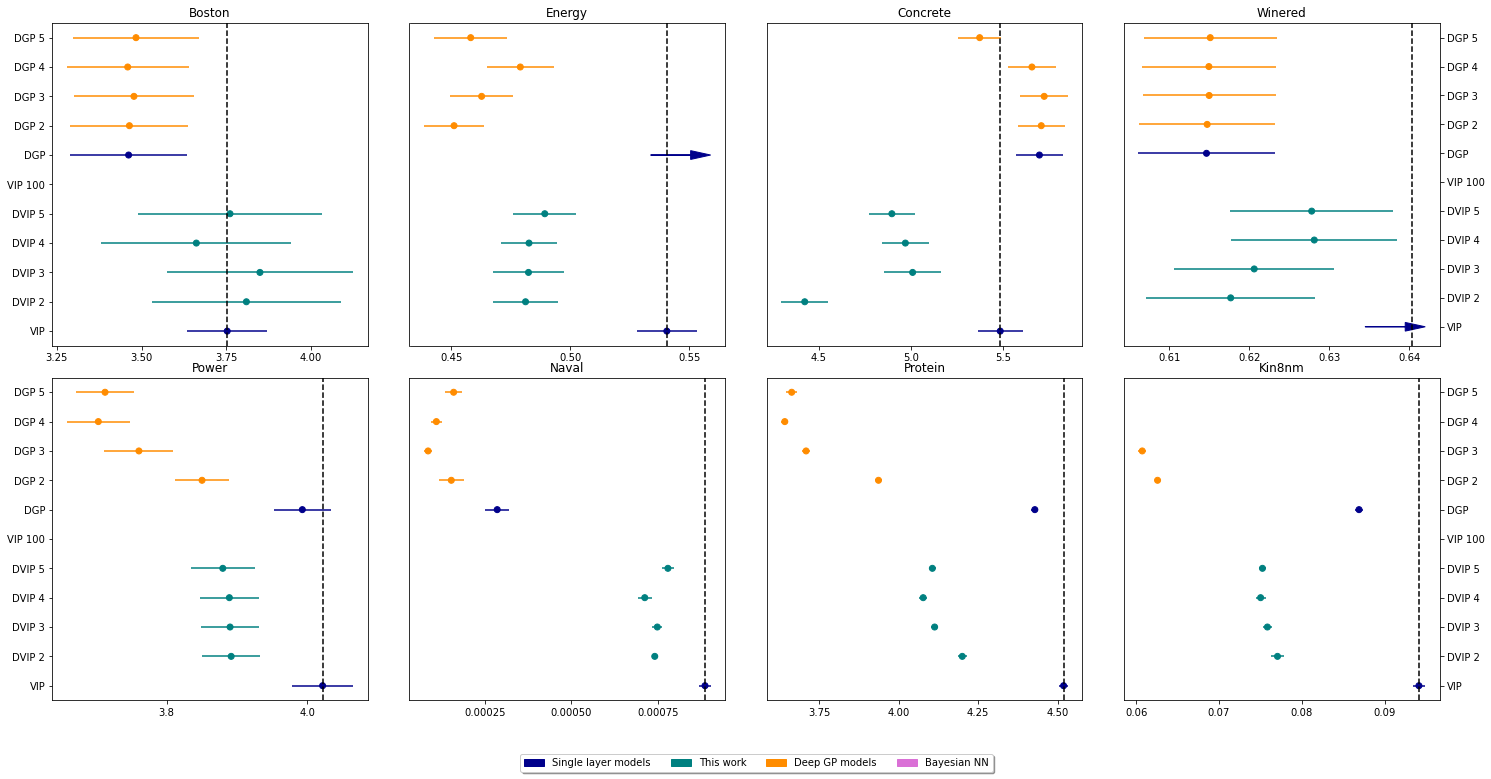

In [73]:
plot_datasets(dataset_names, model_names, colors, "RMSE")

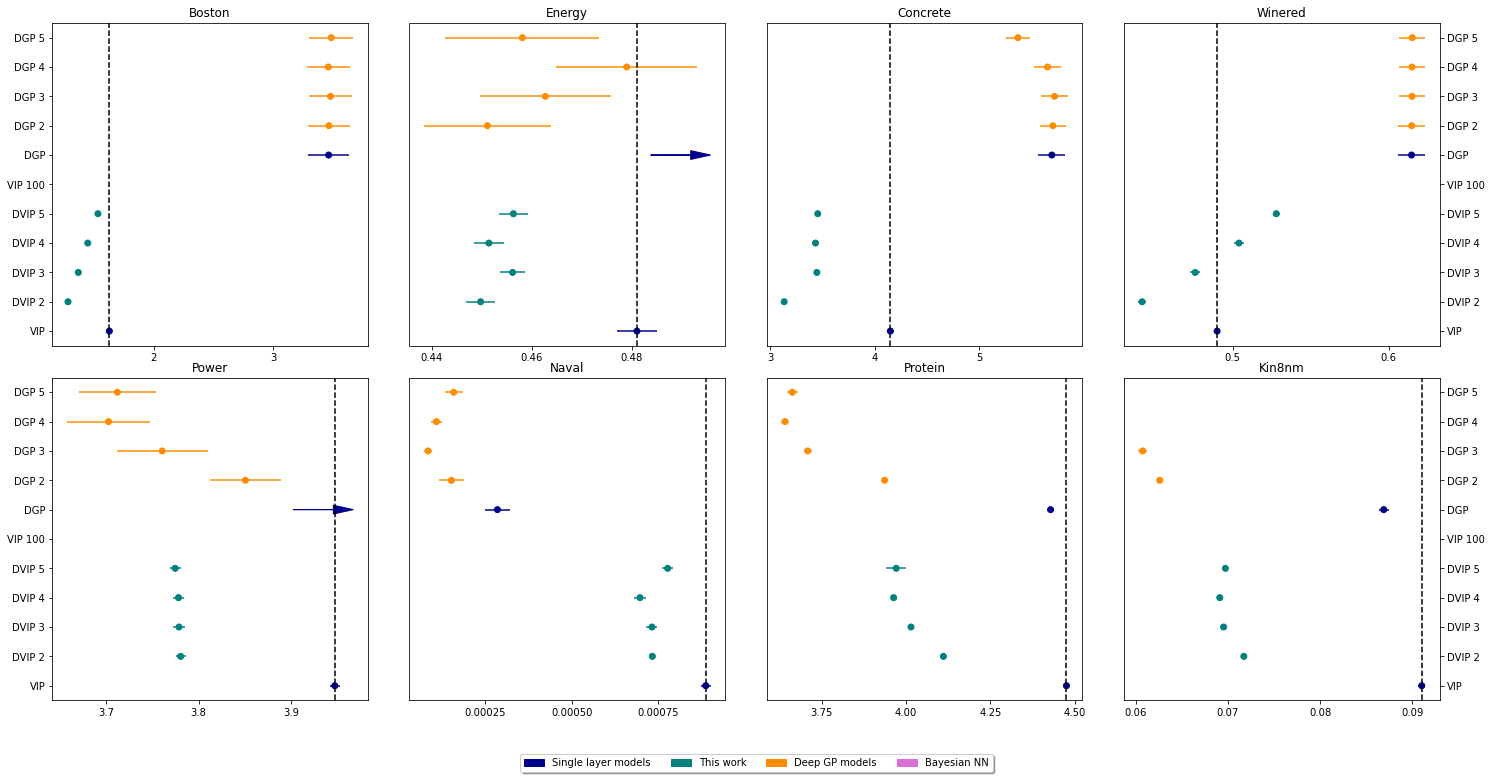

In [74]:
plot_datasets(dataset_names, model_names, colors, "RMSE", train_metrics = True)

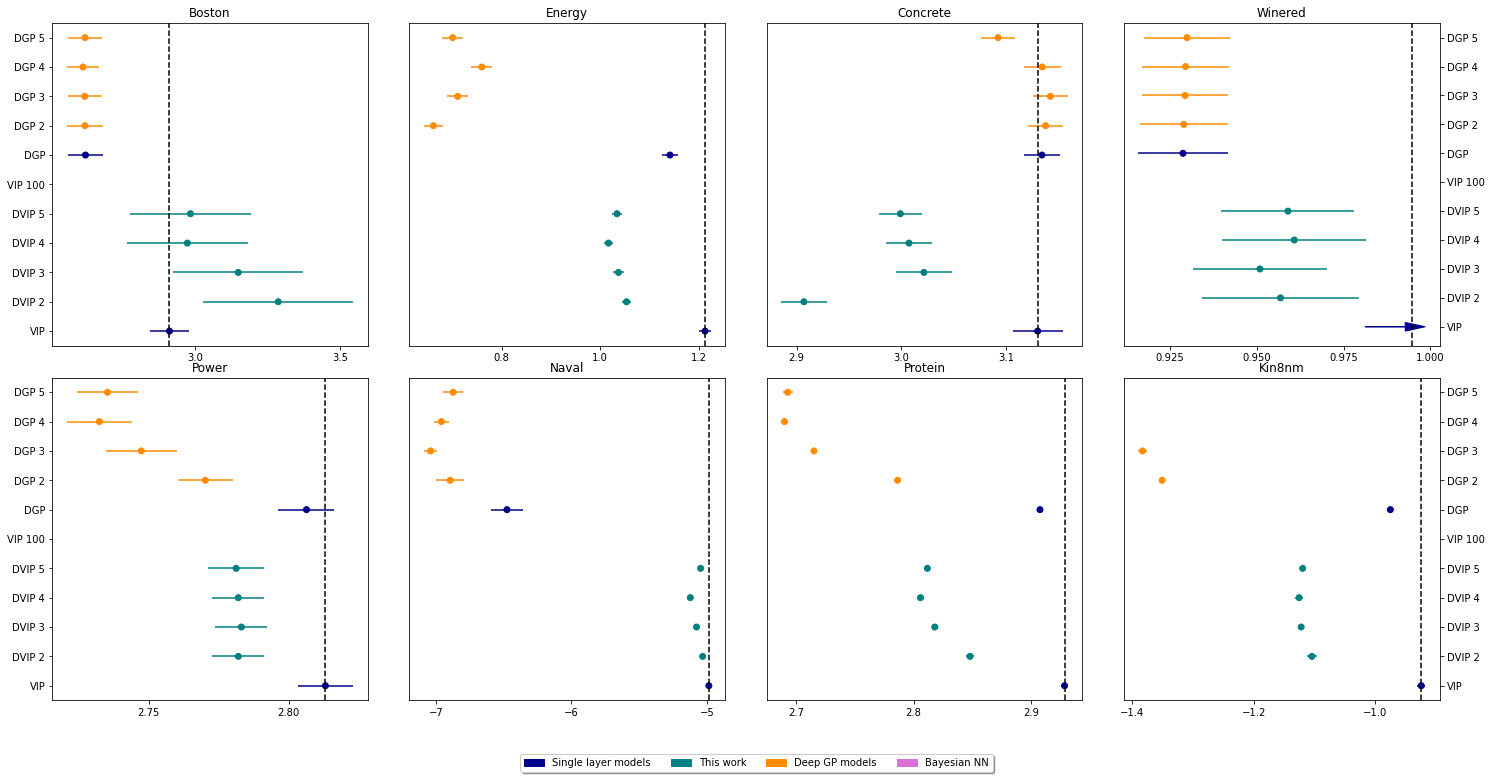

In [75]:
plot_datasets(dataset_names, model_names, colors, "NLL")

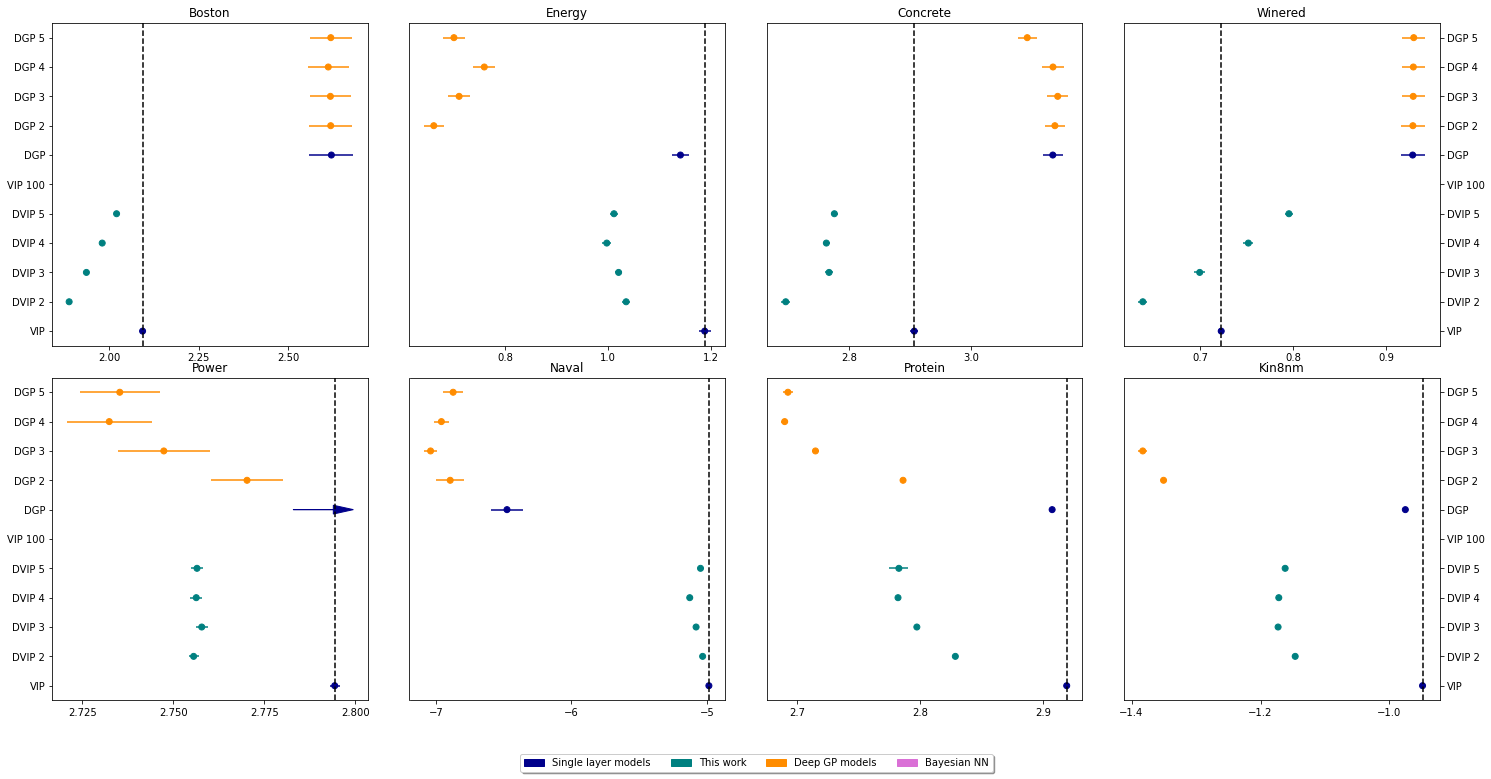

In [76]:
plot_datasets(dataset_names, model_names, colors, "NLL", train_metrics = True)

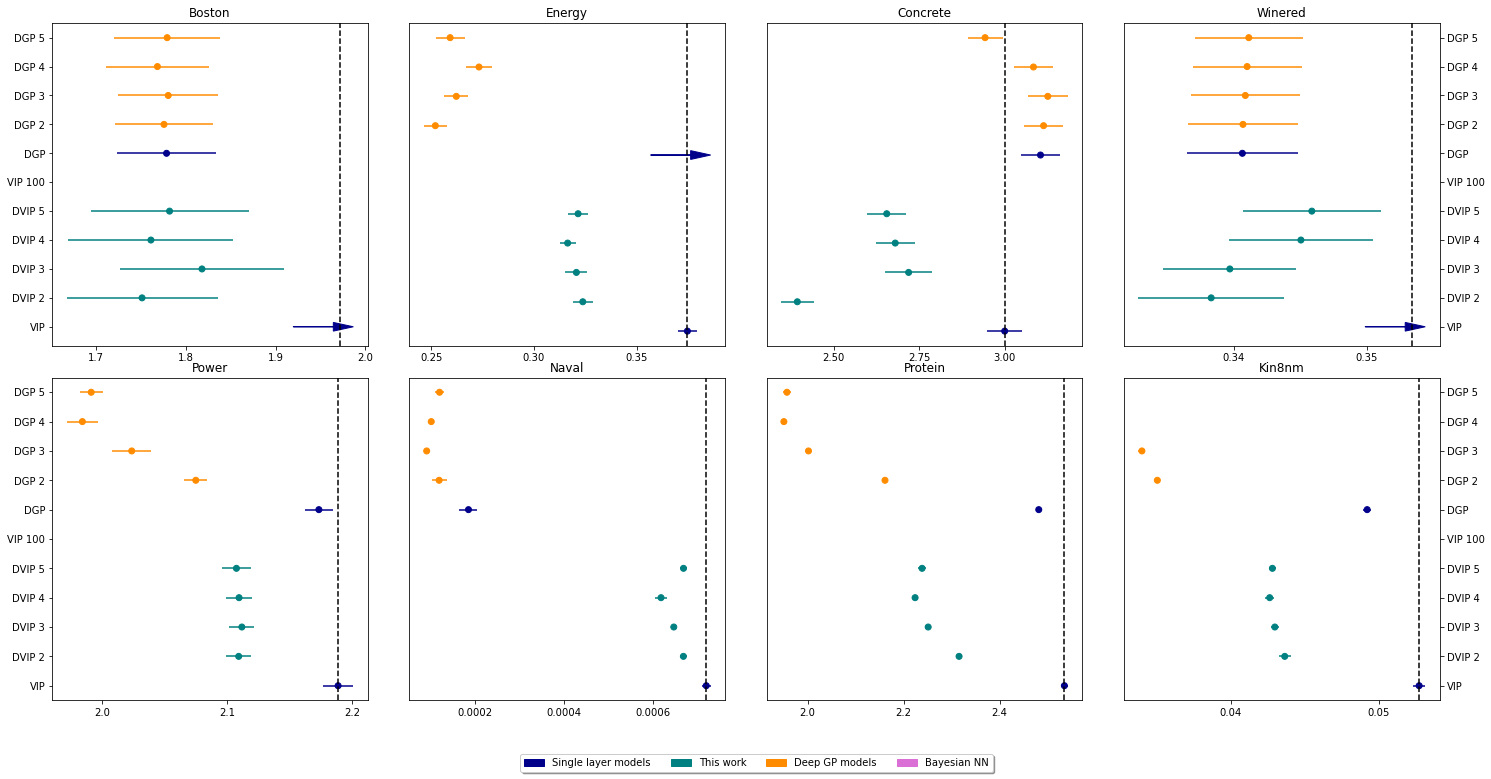

In [77]:
plot_datasets(dataset_names, model_names, colors, "CRPS")

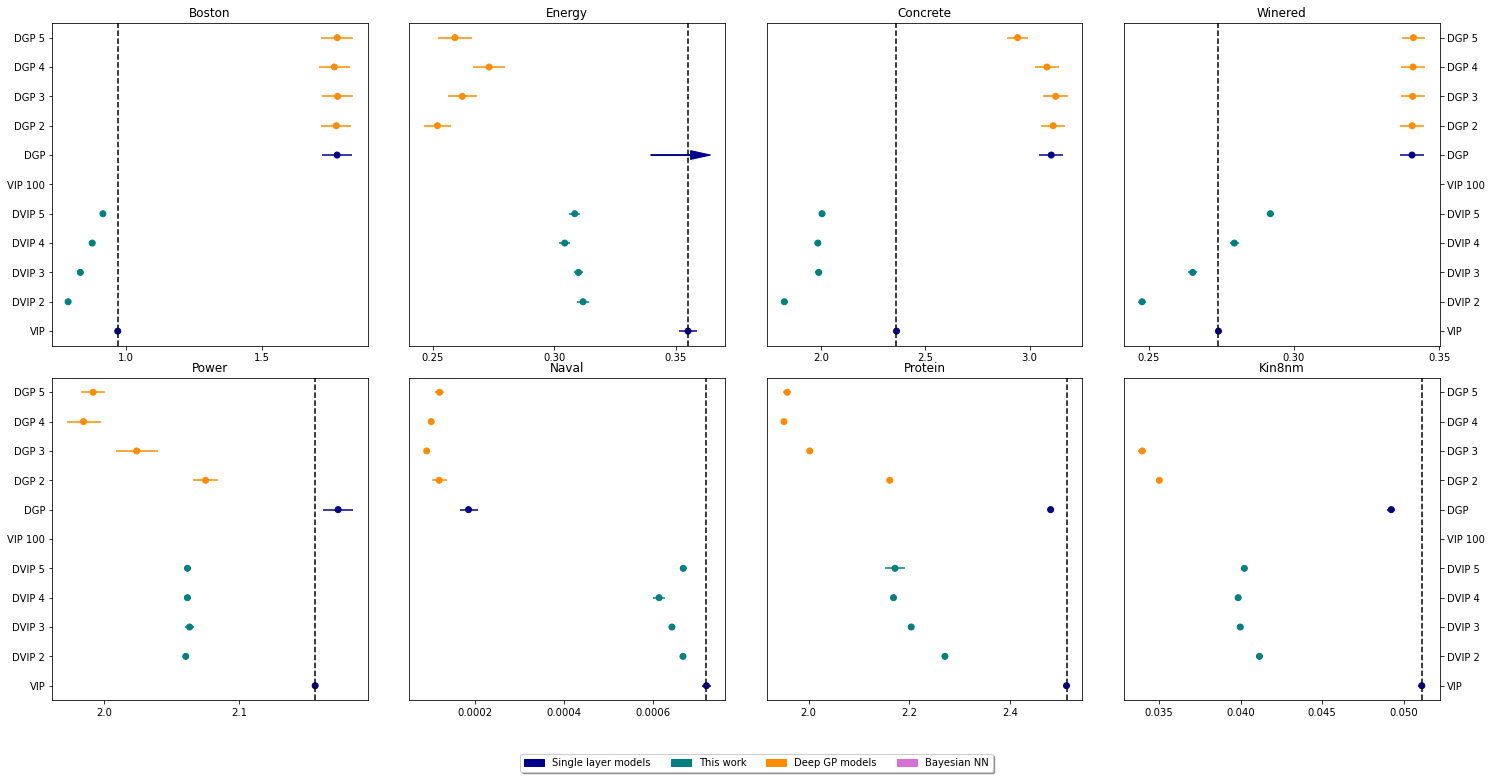

In [78]:
plot_datasets(dataset_names, model_names, colors, "CRPS", train_metrics = True)